<a href="https://colab.research.google.com/github/Aakash0505/CAPSTONE_1/blob/main/Telecom_Churn_Analysis_Capstone_Project_AAKASH_AGRAWAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

#Exploratory Data Analysis of churn dataset
Exploratory Data Analysis (EDA) is an approach to analyse data. The first and foremost task that the data analysts does is to view the data and tries to make some sense out of it. Later we figure out what questions we want to ask and how to use the available data to get the answers we need.

EDA helps us to: 1) Delve into the data set 2)Examine the relationships among the variables 3)Identify any interesting observation 4) Develop an initial idea of possible associations among the predictors and the target variable.

The telecom market in the US is saturated and customer growth rates are low. They key focus of market players therefore is on retention and churn control. This project explores the churn dataset to identify the key drivers of churn and grab key insights from the dataset.

# **`Importing All the neccessary libraries which is useful in our project.`**

In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# `Reading the dataset using pandas`

In [3]:
#reading a csv file and creating pandas dataframe
data=pd.read_csv("/content/drive/MyDrive/Telecom Churn .csv")

Checking the dataset which we have loaded.
 

In [4]:
#head provides the first 5 rows of dataset
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# tail provides the last 5 rows of the dataset
data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


# **General Overview of the dataset**

In [6]:
#row and column
data.shape

(3333, 20)

 we have 3333 rows with 20 columns in our dataset 

In [7]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# Checking the null values

In [8]:
# checking the sum of null values
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


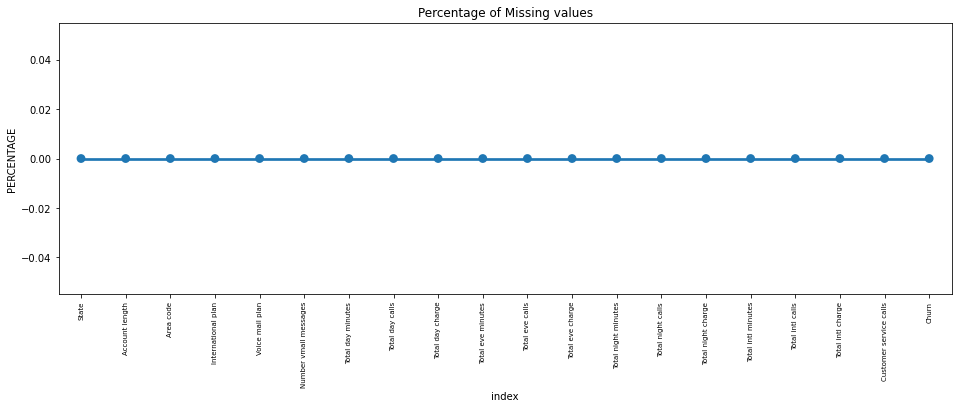

In [9]:
#visualizing the null checking process
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

since there are no null values in any of the columns of our data. 
we don't have to do any data cleaning. 

If there exists a null/missing value in the dataset then we can replace the missing value with mean of the attribute using the following command:

In [10]:
"""data_null # Dataframe
data_null.mean() # mean of the dataframe
data_null.fillna(data_null.mean()) # filling the null values with mean values with the mean of the dataframe"""

'data_null # Dataframe\ndata_null.mean() # mean of the dataframe\ndata_null.fillna(data_null.mean()) # filling the null values with mean values with the mean of the dataframe'

# **`Statistical summary of our dataset`**

In [11]:
#Descriptive Analysis of thr data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


# some important points after descriptive analysis



*   mean account_lenght of data is 101 and 25% having more than 127
*   mean of customer service calls is very less i.e. 1
*   on comparing the day,even and night call we can say that the charges at the day are high and eve are medium and night call charges are very low
* international call charges are very high as compared to day,eve and night.







In [12]:
# check the datatypes of columns
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

# **`Plotting the graph to represent the no. of customer churned`**

Text(0.5, 1.02, 'Count of TARGET Variable per category')

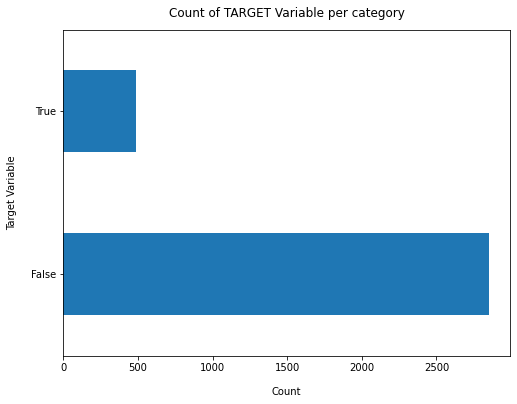

In [13]:
# histogram representing the no. of people churned
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

let's see the percentage of our target variable


In [14]:
# in form of percentage
100*data['Churn'].value_counts()/len(data['Churn'])

False    85.508551
True     14.491449
Name: Churn, dtype: float64

14.49% of costumer churned

Let’s see the value count of our target variable

In [15]:
data["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [16]:
# Descriptive Analysis of object and boolean type data
data.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


Descriptitve analaysis of non numeric values shows us the unique value, top value and it's frequency.

# **`checking the correlation between the variables`**


In [17]:
# Correlation Plot 
corr=data.corr()
corr.style.background_gradient().set_precision(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
Area code,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
Number vmail messages,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.1
Total day minutes,0.0,-0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.2
Total day calls,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
Total day charge,0.0,-0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.2
Total eve minutes,-0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.1
Total eve calls,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
Total eve charge,-0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.1
Total night minutes,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0


It's quite evident from the graph that there exists a perfect linear relationship between between Mins and its corresponding Charge.

# **`Now we are moving on to Visualization part,where we will compare the different attributes and understand the problem of churning`**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


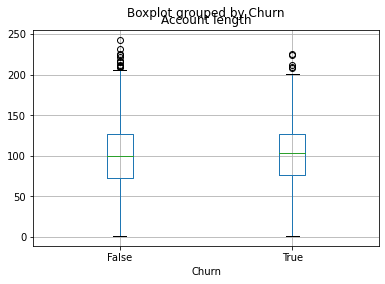

In [18]:
# Box Plot for Account Length attribute 
data.boxplot(column='Account length',by='Churn')

The mean of Account length is almost similar to for both churn groups.

In [19]:
#create dataframe for account length 
def account_cat(a) :
  ac_cat = ''
  if a < 30 :
    ac_cat = 'new'
  elif a < 90 :
    ac_cat = 'below 3 months'
  else :
    ac_cat = 'regular user'
  
  return ac_cat 

In [20]:
data['account category'] = data['Account length'].apply(lambda x : account_cat(x))
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,account category
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,regular user
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,regular user
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,regular user
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,below 3 months
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,below 3 months


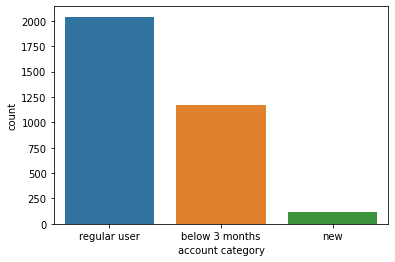

In [21]:
sns.countplot(x="account category",data=data)

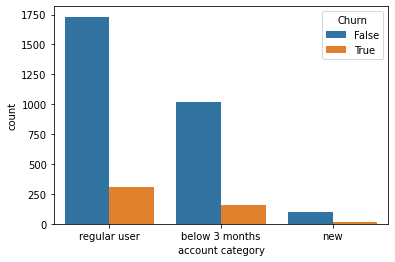

In [22]:
sns.countplot(x="account category", hue='Churn', data=data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


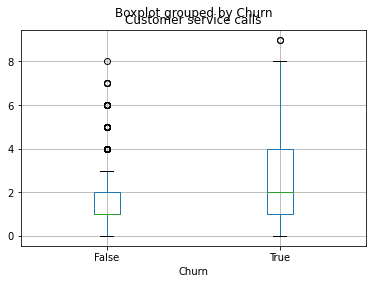

In [23]:
# Box Plot for CustServ Calls attribute 
data.boxplot(column='Customer service calls',by='Churn')

There is a considerable amount of difference in mean of Customer service calls for both the churn groups.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


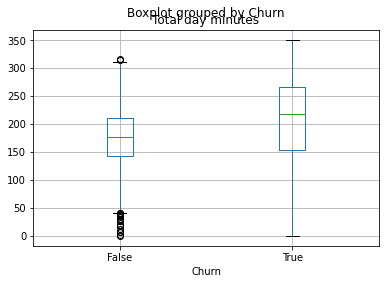

In [24]:
# Box Plot for Total day minutes attribute 
data.boxplot(column='Total day minutes',by='Churn')

The Day Min mean is different for both the churn group.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


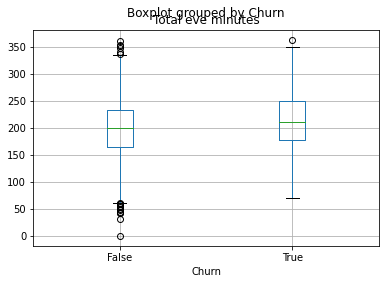

In [25]:
# Box Plot for Total eve minutes attribute 
data.boxplot(column='Total eve minutes',by='Churn')

There is a slight amount of difference in mean of Evening mins for both the churn groups. The Box plot also show us the outliers and range of each variable.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


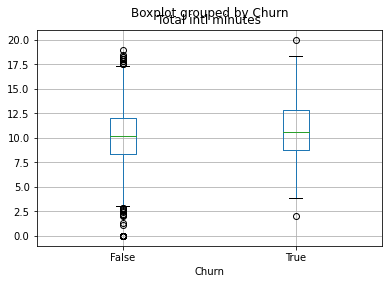

In [26]:
# Box Plot for Total night minutes  attribute 
data.boxplot(column='Total intl minutes',by='Churn')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


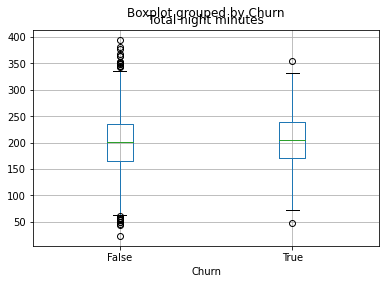

In [27]:
# Box Plot for Total night minutes  attribute 
data.boxplot(column='Total night minutes',by='Churn')

There is a slight amount of difference in mean of night mins for both the churn groups. The Box plot also show us the outliers and range of each variable.

## **`Observing relationship between vmail number and churn.`**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


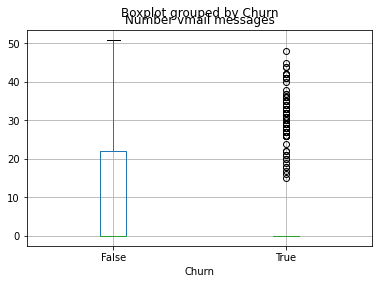

In [28]:
# Box Plot for Total night minutes  attribute 
data.boxplot(column='Number vmail messages',by='Churn')

very few churned customer were using vmail message service

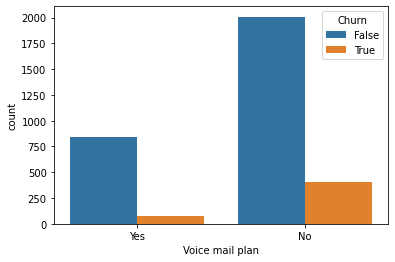

In [29]:
sns.countplot(x="Voice mail plan", hue='Churn', data=data)

# `Graphical representation of each variable`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe08dd8fd50>,
      dtype=object)

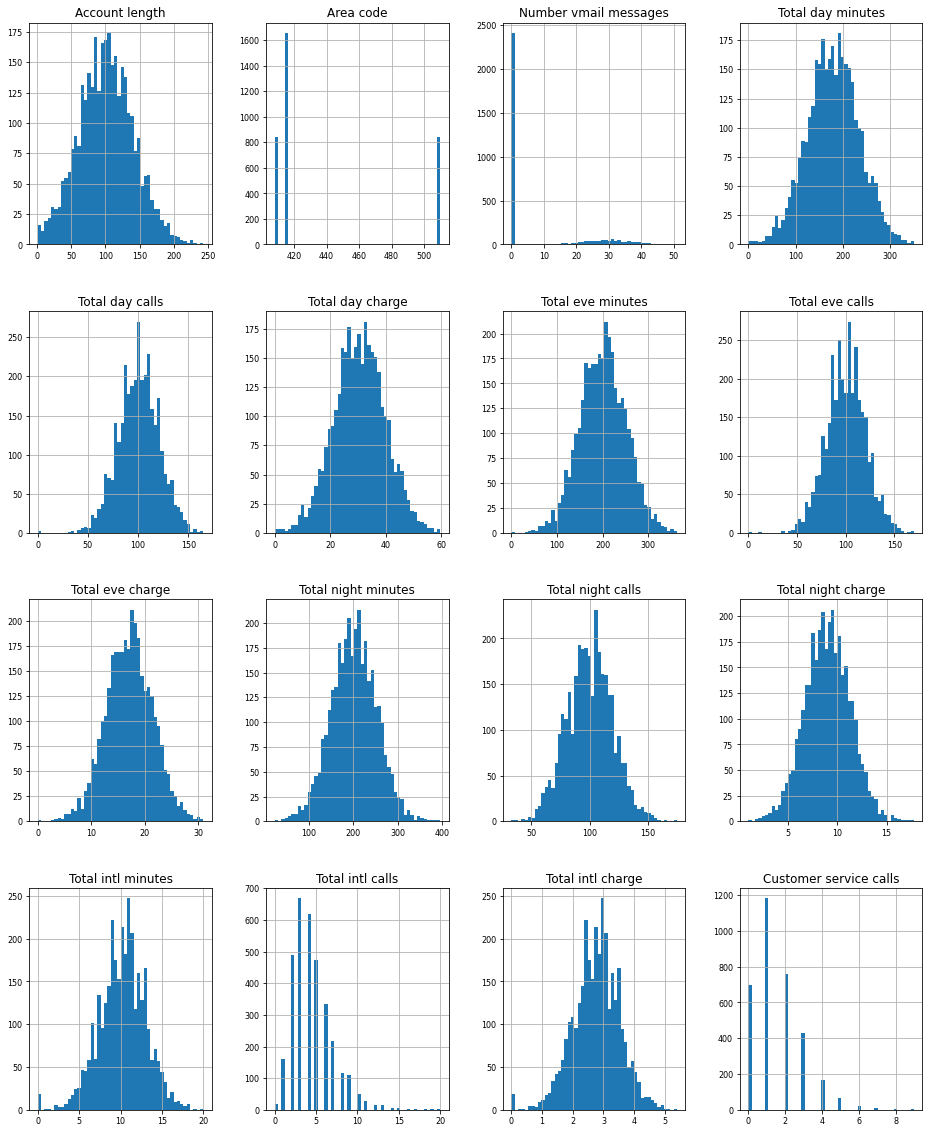

In [30]:
# Histogram for each variable
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

The charge and min variable have similar distribution as they are perfectly correlated.

In [31]:
# International Plan 
pd.crosstab(data['Churn'], data["International plan"], margins=True)

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


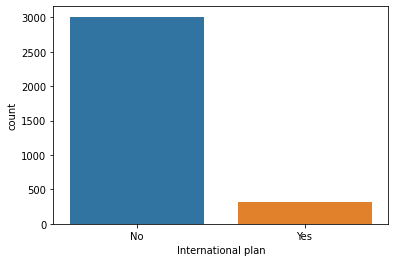

In [32]:
sns.countplot(x="International plan",data=data)

Let’s see how churn rate is related to the International plan variable. We see that, with International Plan, the churn rate is much higher. Clearly, those who have selected the International Plan have a greater chance of leaving the company’s service than do those who do not have the International Plan. Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator’s customers.

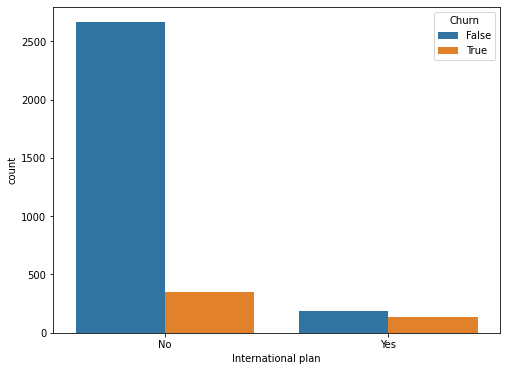

In [33]:
# Histogram of International Plan grouped by churn
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="International plan", hue='Churn', data=data)


In [34]:
# Customer Service Calls 
pd.crosstab(data['Churn'], data["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


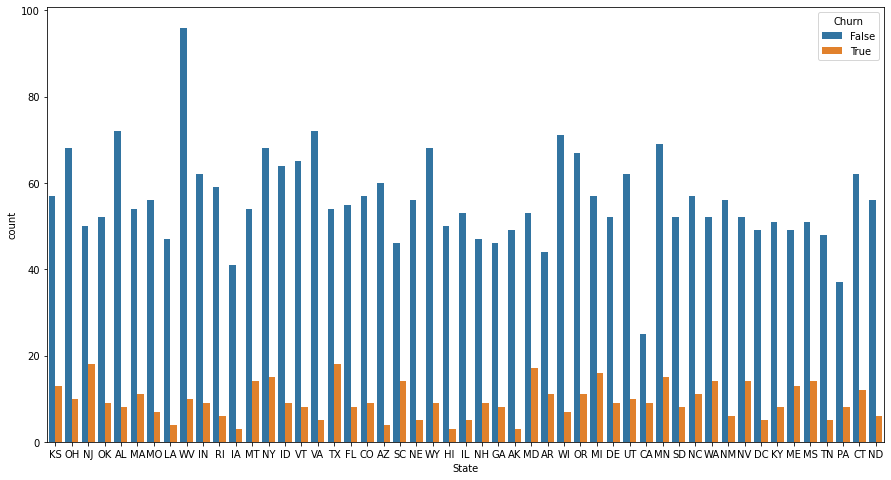

In [35]:
# Histogram of State grouped by churn
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(x="State", hue='Churn', data=data);

The graph clearly says that State is not the reason for customer churn

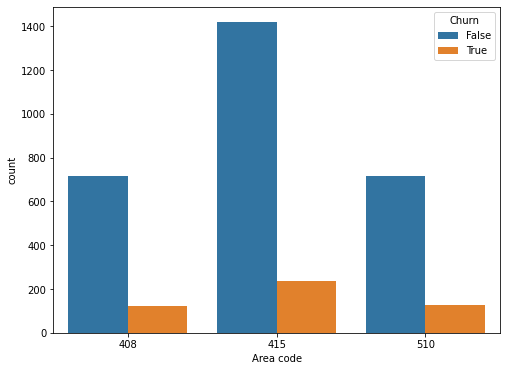

In [36]:
# Histogram of Area Code grouped by churn
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="Area code", hue='Churn', data=data);

Same in the case of Area code.

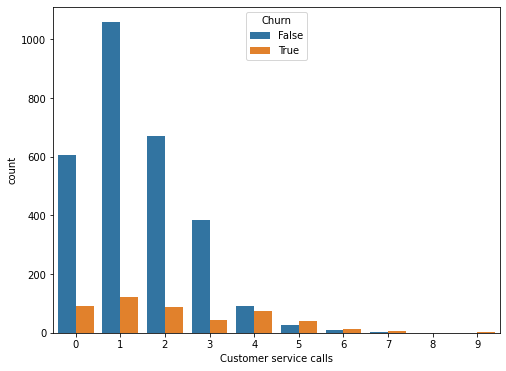

In [37]:
# Histogram of Customer Serice calls grouped by churn  
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="Customer service calls", hue='Churn', data=data);

The picture clearly states that the churn rate strongly increases starting from 4 calls to the service center. Customers who have called customer service three or fewer times have a markedly lower churn rate than that of customers who have called customer service four or more times.

*** Let us consider some of the insights we have gained into the churn data set through the use of exploratory data analysis.***


*   The total percentage of customers churned is 14.49 %.
*   There is no significant relation between account length and churn.
*   The day call rates are higher as compared to evening and night.
*   The area code field is  anomalous, and can be omitted.
*   The states with highest churn rates are NJ,CA,TX,MD and SC.
*   The states with lowest churn rates are HI,AK,AZ,VA and IA.
*   Customers with the International Plan tend to churn more frequently.
*   Customers with four or more customer service calls churn more than four times as often as do the other customers.
*There is no obvious association of churn with the variables day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

